# Assignment 2 Practice Sheet 3

### Farida Madkour 900211360
### DSCI 1412 Section 2

## Install important packages:

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import statsmodels.api as sm

In [4]:
from statsmodels.stats.proportion import proportion_confint

In [5]:
import matplotlib.pyplot as plt

In [6]:
import scipy

In [7]:
from pandas.api.types import CategoricalDtype

## Part 1: International Football Matches Results

### Abstract

The dataset being analyzed is about various football matches from all over the globe. There are several variables in the dataset including, the type of tournament, the city where it was played, the home and away teams, and the results. First and foremost, a code was created to convey whether each match ended as a draw, loss, or win for the home team. Furthermore, a code was constructed to compare the confidence intervals of five countries, which are Algeria, Greece, Australia, Jamaica, and Peru, when they were the location that held the FIFA World Cup Tournament. Additionally, another code was designed with the aim to measure whether fans have an effect on the performance of football players or not in the same five countries. This was done through the calculation of the confidence intervals of each country twice; once when they were the home team and another when they were the guests in another country. Results showed minimal to no effect in all countries except Greece.

### Discussion

The confidence interval when Greece was the home team was much greater than when they were not, which meant that there is a greater level of uncertainty about the performance of the players when they are playing at home.

### Conclusion

#### Import the CSV file

In [8]:
df=pd.read_csv('results.csv')

#### Show first 4 records in the dataset

In [9]:
df.head(4)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False


#### Show the description of the dataset

In [10]:
df.shape

(43188, 9)

In [11]:
df.describe()

,home_score,away_score
count,43188.000000,43188.000000
mean,1.742544,1.182666
std,1.753055,1.399664
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,31.000000,21.000000


### Determine whether the home team won, lost or were at a draw with the away team:

In [12]:
x=df['home_score']-df['away_score']

In [13]:
x

0        0
1        2
2        1
3        0
4        3
        ..
43183    1
43184   -2
43185    0
43186    0
43187    0
Length: 43188, dtype: int64

In [14]:
conditions=[(x>0),(x<0),(x==0)]

In [15]:
values=['win','lose','draw']

In [16]:
df['result']=np.select(conditions,values)

In [17]:
df.head(4)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,result
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,draw
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,win
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,win
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,draw


#### Find out the number of wins, losses and draws:

In [18]:
df['result'].value_counts()

win     21009
lose    12224
draw     9955
Name: result, dtype: int64

In [19]:
df['result'].value_counts(normalize=True)

win     0.486455
lose    0.283042
draw    0.230504
Name: result, dtype: float64

In [20]:
df_noneutral=df[df['neutral']==False]

In [21]:
df_noneutral['result'].value_counts(normalize=True)

win     0.505003
lose    0.263693
draw    0.231304
Name: result, dtype: float64

#### Find the confidence interval of each result:

In [22]:
x=df['result'].value_counts()

In [23]:
x=np.array(x)

In [24]:
x

array([21009, 12224,  9955])

In [25]:
N=x.sum()

In [26]:
N

43188

In [27]:
CI_win=proportion_confint(count=x[1],nobs=N,alpha=(1-.95))

In [28]:
CI_win

(0.27879305599044235, 0.28729011526083115)

In [29]:
CI_lose=proportion_confint(count=x[0],nobs=N,alpha=(1-.95))

In [30]:
CI_lose

(0.481740705905987, 0.49116843552218753)

In [31]:
CI_draw=proportion_confint(count=x[2],nobs=N,alpha=(1-.95))

In [32]:
CI_draw

(0.2265318471530234, 0.23447584016752862)

#### Find out the number of matches played by each country:

In [33]:
df['home_team'].value_counts()

Brazil                       586
Argentina                    561
Mexico                       529
Germany                      521
England                      516
                            ... 
Saint Pierre and Miquelon      1
Sark                           1
Kabylia                        1
Chameria                       1
Saint Helena                   1
Name: home_team, Length: 306, dtype: int64

In [34]:
df['home_team'].value_counts()[50:55]

Algeria      298
Greece       298
Australia    298
Jamaica      293
Peru         292
Name: home_team, dtype: int64

### Compare the confidence intervals of five countries:

#### Country #1 "Algeria"

In [35]:
df_noneutralalgeria=df_noneutral[df_noneutral['country']=='Algeria']

In [36]:
df_noneutralalgeria

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,result
5306,1/6/1963,Algeria,Bulgaria,2,1,Friendly,Algiers,Algeria,False,win
5448,7/7/1963,Algeria,Egypt,2,2,Friendly,Oran,Algeria,False,draw
5578,1/1/1964,Algeria,Germany,2,0,Friendly,Algiers,Algeria,False,win
5737,11/4/1964,Algeria,Russia,2,2,Friendly,Algiers,Algeria,False,draw
5911,6/17/1965,Algeria,Brazil,0,3,Friendly,Oran,Algeria,False,lose
...,...,...,...,...,...,...,...,...,...,...
42313,6/6/2021,Algeria,Mali,1,0,Friendly,Blida,Algeria,False,win
42448,6/17/2021,Algeria,Liberia,5,1,Friendly,Oran,Algeria,False,win
42610,9/2/2021,Algeria,Djibouti,8,0,FIFA World Cup qualification,Blida,Algeria,False,win
42807,10/8/2021,Algeria,Niger,6,1,FIFA World Cup qualification,Algiers,Algeria,False,win


In [37]:
df_noneutralalgeria.shape

(195, 10)

In [38]:
df_noneutralalgeria['home_team'].value_counts()

Algeria    195
Name: home_team, dtype: int64

In [39]:
df_noneutralalgeria['away_team'].value_counts()

Morocco         12
Burkina Faso    11
Tunisia         11
Senegal         10
Guinea           7
                ..
North Korea      1
Kenya            1
Palestine        1
Slovakia         1
Djibouti         1
Name: away_team, Length: 71, dtype: int64

In [40]:
df_noneutralalgeria['result'].value_counts()

win     124
draw     45
lose     26
Name: result, dtype: int64

In [41]:
df_noneutralalgeria['result'].value_counts(normalize=True)

win     0.635897
draw    0.230769
lose    0.133333
Name: result, dtype: float64

In [42]:
prob_algeria=0.635897/0.230769

In [43]:
prob_algeria

2.7555564222230893

In [44]:
df_noneutralalgeria['tournament'].value_counts()

Friendly                                      97
FIFA World Cup qualification                  46
African Cup of Nations qualification          43
African Cup of Nations                         5
Arab Cup qualification                         2
African Nations Championship                   1
African Nations Championship qualification     1
Name: tournament, dtype: int64

#### Selecting FIFA World Cup qualification matches in Algeria

In [45]:
df_noneutralalgeria_fifa=df_noneutralalgeria[df_noneutralalgeria['tournament']=='FIFA World Cup qualification']

In [46]:
df_noneutralalgeria_fifa

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,result
6997,11/17/1968,Algeria,Tunisia,1,2,FIFA World Cup qualification,Algiers,Algeria,False,lose
8163,3/2/1972,Algeria,Guinea,1,0,FIFA World Cup qualification,Algiers,Algeria,False,win
9755,4/1/1976,Algeria,Libya,1,0,FIFA World Cup qualification,Algiers,Algeria,False,win
10138,2/28/1977,Algeria,Tunisia,1,1,FIFA World Cup qualification,Algiers,Algeria,False,draw
11400,6/13/1980,Algeria,Sierra Leone,3,1,FIFA World Cup qualification,Oran,Algeria,False,win
11706,12/12/1980,Algeria,Sudan,2,0,FIFA World Cup qualification,Constantine,Algeria,False,win
11892,5/1/1981,Algeria,Niger,4,0,FIFA World Cup qualification,Constantine,Algeria,False,win
12126,10/30/1981,Algeria,Nigeria,2,1,FIFA World Cup qualification,Constantine,Algeria,False,win
13782,4/19/1985,Algeria,Angola,3,2,FIFA World Cup qualification,Algiers,Algeria,False,win
13944,7/13/1985,Algeria,Zambia,2,0,FIFA World Cup qualification,Algiers,Algeria,False,win


In [47]:
x=df_noneutralalgeria_fifa['result'].value_counts()

In [48]:
x[0]

31

In [49]:
import statsmodels.api as sm

In [50]:
from statsmodels.stats.proportion import proportion_confint

In [51]:
#confidence interval

In [52]:
ci_win_algeria=proportion_confint(count=x[0],nobs=x.sum(),alpha=(1-.95))

In [53]:
ci_win_algeria

(0.538444700091684, 0.8093813868648377)

#### Country #2 "Greece"

In [54]:
df_noneutralgreece=df_noneutral[df_noneutral['country']=='Greece']

In [55]:
df_noneutralgreece

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,result
1268,1/26/1930,Greece,Yugoslavia,2,1,Balkan Cup,Athens,Greece,False,win
1364,12/7/1930,Greece,Bulgaria,6,1,Balkan Cup,Athens,Greece,False,win
1455,11/29/1931,Greece,Romania,2,4,Balkan Cup,Athens,Greece,False,lose
1472,3/27/1932,Greece,Bulgaria,1,2,Friendly,Athens,Greece,False,lose
1473,3/30/1932,Greece,Bulgaria,2,2,Friendly,Athens,Greece,False,draw
...,...,...,...,...,...,...,...,...,...,...
42128,3/28/2021,Greece,Honduras,2,1,Friendly,Thessaloniki,Greece,False,win
42203,3/31/2021,Greece,Georgia,1,1,FIFA World Cup qualification,Thessaloniki,Greece,False,draw
42737,9/8/2021,Greece,Sweden,2,1,FIFA World Cup qualification,Athens,Greece,False,win
42946,11/11/2021,Greece,Spain,0,1,FIFA World Cup qualification,Athens,Greece,False,lose


In [56]:
df_noneutralgreece['home_team'].value_counts()

Greece    267
Rhodes      3
Name: home_team, dtype: int64

In [57]:
#When home team was Rhodes

In [58]:
df_noneutralgreece[df_noneutralgreece['home_team']=='Rhodes']

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,result
29469,7/1/2007,Rhodes,Frøya,3,1,Island Games,Rhodes,Greece,False,win
29489,7/4/2007,Rhodes,Western Isles,1,0,Island Games,Rhodes,Greece,False,win
29497,7/5/2007,Rhodes,Gibraltar,0,4,Island Games,Rhodes,Greece,False,lose


In [59]:
df_noneutralgreece['away_team'].value_counts()

Romania         16
Cyprus          14
Bulgaria        13
Russia          11
Hungary         10
                ..
Saudi Arabia     1
Cameroon         1
Bolivia          1
San Marino       1
Honduras         1
Name: away_team, Length: 72, dtype: int64

In [60]:
df_noneutralgreece['result'].value_counts(normalize=True)

win     0.474074
lose    0.300000
draw    0.225926
Name: result, dtype: float64

In [61]:
#win/lose

In [62]:
prob_greece=0.474074/0.300000

In [63]:
prob_greece

1.5802466666666668

#### Selecting FIFA World Cup qualification matches in Greece

In [64]:
df_noneutralgreece_fifa=df_noneutralgreece[df_noneutralgreece['tournament']=='FIFA World Cup qualification']

In [65]:
df_noneutralgreece_fifa

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,result
2067,2/20/1938,Greece,Israel,1,0,FIFA World Cup qualification,Athens,Greece,False,win
3579,11/1/1953,Greece,Israel,1,0,FIFA World Cup qualification,Athens,Greece,False,win
3621,3/28/1954,Greece,Yugoslavia,0,1,FIFA World Cup qualification,Athens,Greece,False,lose
4152,5/5/1957,Greece,Yugoslavia,0,0,FIFA World Cup qualification,Athens,Greece,False,draw
4187,6/16/1957,Greece,Romania,1,2,FIFA World Cup qualification,Athens,Greece,False,lose
...,...,...,...,...,...,...,...,...,...,...
39543,11/12/2017,Greece,Croatia,0,0,FIFA World Cup qualification,Piraeus,Greece,False,draw
42203,3/31/2021,Greece,Georgia,1,1,FIFA World Cup qualification,Thessaloniki,Greece,False,draw
42737,9/8/2021,Greece,Sweden,2,1,FIFA World Cup qualification,Athens,Greece,False,win
42946,11/11/2021,Greece,Spain,0,1,FIFA World Cup qualification,Athens,Greece,False,lose


In [66]:
x=df_noneutralgreece_fifa['result'].value_counts()

In [67]:
x[0]

34

In [68]:
#confidence interval

In [69]:
ci_win_greece=proportion_confint(count=x[0],nobs=x.sum(),alpha=(1-.95))

In [70]:
ci_win_greece

(0.38775216708297616, 0.6271732060513523)

#### Country #3 "Australia"

In [71]:
df_noneutralaustralia=df_noneutral[df_noneutral['country']=='Australia']

In [72]:
df_noneutralaustralia

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,result
726,6/9/1923,Australia,New Zealand,2,1,Friendly,Brisbane,Australia,False,win
729,6/16/1923,Australia,New Zealand,2,3,Friendly,Sydney,Australia,False,lose
737,6/30/1923,Australia,New Zealand,1,4,Friendly,Newcastle,Australia,False,lose
811,6/7/1924,Australia,Canada,3,2,Friendly,Brisbane,Australia,False,win
813,6/14/1924,Australia,Canada,0,1,Friendly,Sydney,Australia,False,lose
...,...,...,...,...,...,...,...,...,...,...
39589,11/15/2017,Australia,Honduras,3,1,FIFA World Cup qualification,Sydney,Australia,False,win
40453,11/17/2018,Australia,South Korea,1,1,Friendly,Brisbane,Australia,False,draw
40506,11/20/2018,Australia,Lebanon,3,0,Friendly,Sydney,Australia,False,win
41369,10/10/2019,Australia,Nepal,5,0,FIFA World Cup qualification,Canberra,Australia,False,win


In [73]:
df_noneutralaustralia['home_team'].value_counts()

Australia    218
Name: home_team, dtype: int64

In [74]:
df_noneutralaustralia['away_team'].value_counts()

New Zealand             29
South Africa            13
Japan                   10
Israel                   8
Czechoslovakia           8
South Korea              7
Canada                   7
Tahiti                   6
India                    6
Greece                   6
Iraq                     6
Solomon Islands          6
Sweden                   5
England                  5
Indonesia                5
Paraguay                 5
Fiji                     5
Oman                     4
Saudi Arabia             4
Ghana                    4
Kuwait                   4
China PR                 4
Uruguay                  3
Brazil                   3
Argentina                3
Croatia                  3
Hong Kong                3
Bulgaria                 3
Iran                     3
Taiwan                   2
United Arab Emirates     2
Jordan                   2
Thailand                 2
Qatar                    2
Bahrain                  2
Turkey                   2
Mexico                   2
N

In [75]:
df_noneutralaustralia['result'].value_counts(normalize=True)

win     0.559633
lose    0.247706
draw    0.192661
Name: result, dtype: float64

In [76]:
#win/lose

In [77]:
prob_australia=0.559633/0.247706

In [78]:
prob_australia

2.2592629972628844

#### Selecting FIFA World Cup qualification matches in Australia

In [79]:
df_noneutralaustralia_fifa=df_noneutralaustralia[df_noneutralaustralia['tournament']=='FIFA World Cup qualification']

In [80]:
df_noneutralaustralia_fifa

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,result
7408,12/14/1969,Australia,Israel,1,1,FIFA World Cup qualification,Sydney,Australia,False,draw
8581,3/11/1973,Australia,Iraq,3,1,FIFA World Cup qualification,Sydney,Australia,False,win
8583,3/13/1973,Australia,Indonesia,2,1,FIFA World Cup qualification,Sydney,Australia,False,win
8585,3/16/1973,Australia,New Zealand,3,3,FIFA World Cup qualification,Sydney,Australia,False,draw
8588,3/18/1973,Australia,Iraq,0,0,FIFA World Cup qualification,Melbourne,Australia,False,draw
...,...,...,...,...,...,...,...,...,...,...
39335,9/5/2017,Australia,Thailand,2,1,FIFA World Cup qualification,Melbourne,Australia,False,win
39458,10/10/2017,Australia,Syria,2,1,FIFA World Cup qualification,Sydney,Australia,False,win
39589,11/15/2017,Australia,Honduras,3,1,FIFA World Cup qualification,Sydney,Australia,False,win
41369,10/10/2019,Australia,Nepal,5,0,FIFA World Cup qualification,Canberra,Australia,False,win


In [81]:
x=df_noneutralaustralia_fifa['result'].value_counts()

In [82]:
x[0]

57

In [83]:
#confidence interval

In [84]:
ci_win_australia=proportion_confint(count=x[0],nobs=x.sum(),alpha=(1-.95))

In [85]:
ci_win_australia

(0.6633437645470914, 0.8566562354529086)

#### Country #4 "Jamaica"

In [86]:
df_noneutraljamaica=df_noneutral[df_noneutral['country']=='Jamaica']

In [87]:
df_noneutraljamaica

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,result
953,3/3/1926,Jamaica,Curaçao,2,0,Friendly,Kingston,Jamaica,False,win
1025,11/20/1926,Jamaica,Haiti,6,0,Friendly,Kingston,Jamaica,False,win
1855,12/28/1935,Jamaica,Trinidad and Tobago,2,3,Friendly,Kingston,Jamaica,False,lose
1857,1/4/1936,Jamaica,Trinidad and Tobago,0,1,Friendly,Kingston,Jamaica,False,lose
1858,1/11/1936,Jamaica,Trinidad and Tobago,1,2,Friendly,Kingston,Jamaica,False,lose
...,...,...,...,...,...,...,...,...,...,...
41410,10/12/2019,Jamaica,Aruba,2,0,CONCACAF Nations League,Kingston,Jamaica,False,win
41651,11/18/2019,Jamaica,Guyana,1,1,CONCACAF Nations League,Montego Bay,Jamaica,False,draw
42692,9/5/2021,Jamaica,Panama,0,3,FIFA World Cup qualification,Kingston,Jamaica,False,lose
42839,10/10/2021,Jamaica,Canada,0,0,FIFA World Cup qualification,Kingston,Jamaica,False,draw


In [88]:
df_noneutraljamaica['home_team'].value_counts()

Jamaica    221
Name: home_team, dtype: int64

In [89]:
df_noneutraljamaica['away_team'].value_counts()

Trinidad and Tobago                 28
Haiti                               26
Cuba                                18
Costa Rica                          12
Canada                              10
United States                       10
Curaçao                              9
El Salvador                          9
Panama                               9
Honduras                             8
Mexico                               7
Barbados                             7
Saint Lucia                          6
Bermuda                              4
Guadeloupe                           3
Cayman Islands                       3
Guatemala                            3
Suriname                             3
Antigua and Barbuda                  3
Venezuela                            3
Guyana                               3
Saint Kitts and Nevis                3
Paraguay                             3
Puerto Rico                          3
Nigeria                              2
Grenada                  

In [90]:
df_noneutraljamaica['result'].value_counts(normalize=True)

win     0.529412
draw    0.248869
lose    0.221719
Name: result, dtype: float64

In [91]:
#win/lose

In [92]:
prob_jamaica=0.529412/0.248869

In [93]:
prob_jamaica

2.127271777521507

#### Selecting FIFA World Cup qualification matches in Jamaica

In [94]:
df_noneutraljamaica_fifa=df_noneutraljamaica[df_noneutraljamaica['tournament']=='FIFA World Cup qualification']

In [95]:
df_noneutraljamaica_fifa

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,result
5770,1/16/1965,Jamaica,Cuba,2,0,FIFA World Cup qualification,Kingston,Jamaica,False,win
5773,1/23/1965,Jamaica,Curaçao,2,0,FIFA World Cup qualification,Kingston,Jamaica,False,win
5860,5/3/1965,Jamaica,Mexico,2,3,FIFA World Cup qualification,Kingston,Jamaica,False,lose
5883,5/22/1965,Jamaica,Costa Rica,1,1,FIFA World Cup qualification,Kingston,Jamaica,False,draw
9897,8/15/1976,Jamaica,Cuba,1,3,FIFA World Cup qualification,Kingston,Jamaica,False,lose
15056,5/12/1988,Jamaica,Puerto Rico,1,0,FIFA World Cup qualification,Kingston,Jamaica,False,win
15176,7/24/1988,Jamaica,United States,0,0,FIFA World Cup qualification,Kingston,Jamaica,False,draw
17053,5/23/1992,Jamaica,Puerto Rico,2,1,FIFA World Cup qualification,Kingston,Jamaica,False,win
17363,10/18/1992,Jamaica,Canada,1,1,FIFA World Cup qualification,Kingston,Jamaica,False,draw
17413,11/8/1992,Jamaica,Bermuda,3,2,FIFA World Cup qualification,Kingston,Jamaica,False,win


In [96]:
x=df_noneutraljamaica_fifa['result'].value_counts()

In [97]:
x[0]

24

In [98]:
#confidence interval

In [99]:
ci_win_jamaica=proportion_confint(count=x[0],nobs=x.sum(),alpha=(1-.95))

In [100]:
ci_win_jamaica

(0.34982764791967025, 0.6297641888150236)

#### Country #5 "Peru"

In [101]:
df_noneutralperu=df_noneutral[df_noneutral['country']=='Peru']

In [102]:
df_noneutralperu

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,result
1096,11/1/1927,Peru,Uruguay,0,4,Copa América,Lima,Peru,False,lose
1103,11/13/1927,Peru,Bolivia,3,2,Copa América,Lima,Peru,False,win
1106,11/27/1927,Peru,Argentina,1,5,Copa América,Lima,Peru,False,lose
1757,1/13/1935,Peru,Uruguay,0,1,Copa América,Lima,Peru,False,lose
1759,1/20/1935,Peru,Argentina,1,4,Copa América,Lima,Peru,False,lose
...,...,...,...,...,...,...,...,...,...,...
42689,9/5/2021,Peru,Venezuela,1,0,FIFA World Cup qualification,Lima,Peru,False,win
42790,10/7/2021,Peru,Chile,2,0,FIFA World Cup qualification,Lima,Peru,False,win
42955,11/11/2021,Peru,Bolivia,3,0,FIFA World Cup qualification,Lima,Peru,False,win
43136,1/16/2022,Peru,Panama,1,1,Friendly,Lima,Peru,False,draw


In [103]:
df_noneutralperu['home_team'].value_counts()

Peru    243
Name: home_team, dtype: int64

In [104]:
df_noneutralperu['away_team'].value_counts()

Chile                  35
Uruguay                30
Argentina              23
Paraguay               23
Colombia               22
Bolivia                21
Ecuador                17
Venezuela              13
Brazil                 12
Costa Rica              5
Bulgaria                4
Panama                  4
Mexico                  4
Honduras                3
Czechoslovakia          2
Russia                  2
Guatemala               2
Romania                 2
England                 2
United States           1
Scotland                1
New Zealand             1
Trinidad and Tobago     1
Nigeria                 1
Senegal                 1
Haiti                   1
Slovakia                1
Belarus                 1
Armenia                 1
Canada                  1
China PR                1
Poland                  1
Hungary                 1
Spain                   1
El Salvador             1
Jamaica                 1
Name: away_team, dtype: int64

In [105]:
df_noneutralperu['result'].value_counts(normalize=True)

win     0.444444
lose    0.337449
draw    0.218107
Name: result, dtype: float64

In [106]:
#win/lose

In [107]:
prob_peru=0.444444/0.337449

In [108]:
prob_peru

1.3170701350426286

#### Selecting FIFA World Cup qualification matches in Peru

In [109]:
df_noneutralperu_fifa=df_noneutralperu[df_noneutralperu['tournament']=='FIFA World Cup qualification']

In [110]:
df_noneutralgreece_fifa

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,result
2067,2/20/1938,Greece,Israel,1,0,FIFA World Cup qualification,Athens,Greece,False,win
3579,11/1/1953,Greece,Israel,1,0,FIFA World Cup qualification,Athens,Greece,False,win
3621,3/28/1954,Greece,Yugoslavia,0,1,FIFA World Cup qualification,Athens,Greece,False,lose
4152,5/5/1957,Greece,Yugoslavia,0,0,FIFA World Cup qualification,Athens,Greece,False,draw
4187,6/16/1957,Greece,Romania,1,2,FIFA World Cup qualification,Athens,Greece,False,lose
...,...,...,...,...,...,...,...,...,...,...
39543,11/12/2017,Greece,Croatia,0,0,FIFA World Cup qualification,Piraeus,Greece,False,draw
42203,3/31/2021,Greece,Georgia,1,1,FIFA World Cup qualification,Thessaloniki,Greece,False,draw
42737,9/8/2021,Greece,Sweden,2,1,FIFA World Cup qualification,Athens,Greece,False,win
42946,11/11/2021,Greece,Spain,0,1,FIFA World Cup qualification,Athens,Greece,False,lose


In [111]:
x=df_noneutralperu_fifa['result'].value_counts()

In [112]:
x[0]

35

In [113]:
#confidence interval

In [114]:
ci_win_peru=proportion_confint(count=x[0],nobs=x.sum(),alpha=(1-.95))

In [115]:
ci_win_peru

(0.32422061280408987, 0.5399769180601076)

### Plot graph using confidence intervals of each country

In [116]:
ci_win = {}
ci_win['Country'] = ['Algeria','Greece','Australia','Jamaica','Peru']
ci_win['lb'] = [ci_win_algeria[0],ci_win_greece[0],ci_win_australia[0],ci_win_jamaica[0],ci_win_peru[0]]
ci_win['ub'] = [ci_win_algeria[1],ci_win_greece[1],ci_win_australia[1],ci_win_jamaica[1],ci_win_peru[1]]
df_ci= pd.DataFrame(ci_win)
df_ci

,Country,lb,ub
0,Algeria,0.538445,0.809381
1,Greece,0.387752,0.627173
2,Australia,0.663344,0.856656
3,Jamaica,0.349828,0.629764
4,Peru,0.324221,0.539977


([<matplotlib.axis.YTick at 0x7f82b10e7b50>,
 [Text(0, 0, 'Algeria'),
  Text(0, 1, 'Greece'),
  Text(0, 2, 'Australia'),
  Text(0, 3, 'Jamaica'),
  Text(0, 4, 'Peru')])

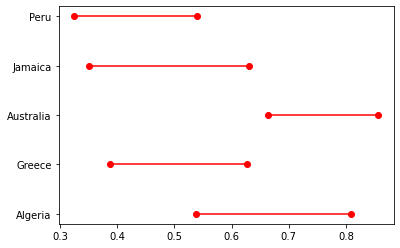

In [117]:
import matplotlib.pyplot as plt
for lb,ub,y in zip(df_ci['lb'],df_ci['ub'],range(len(df_ci))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_ci)),list(df_ci['Country']))

### The impact of fans on match results:

#### In Algeria

In [118]:
df_noneutralalgeria['home']=(df_noneutralalgeria['home_team']=='Algeria')

/var/folders/3m/bxpcj6d907q836kvw4zwr1340000gn/T/ipykernel_4752/526412987.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_noneutralalgeria['home']=(df_noneutralalgeria['home_team']=='Algeria')


In [119]:
df_noneutralalgeria['home'].value_counts()

True    195
Name: home, dtype: int64

In [120]:
x=pd.crosstab(df_noneutralalgeria['home'],df_noneutralalgeria['result'],margins=True)

In [121]:
x

result,draw,lose,win,All
home,,,,
True,45,26,124,195
All,45,26,124,195


In [122]:
df_noneutralalgeria.head(4)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,result,home
5306,1/6/1963,Algeria,Bulgaria,2,1,Friendly,Algiers,Algeria,False,win,True
5448,7/7/1963,Algeria,Egypt,2,2,Friendly,Oran,Algeria,False,draw,True
5578,1/1/1964,Algeria,Germany,2,0,Friendly,Algiers,Algeria,False,win,True
5737,11/4/1964,Algeria,Russia,2,2,Friendly,Algiers,Algeria,False,draw,True


In [123]:
x=np.array(x)

In [124]:
x

array([[ 45,  26, 124, 195],
       [ 45,  26, 124, 195]])

In [125]:
CI_algeriawin_home=proportion_confint(count=x[1,2],nobs=x[1,3],alpha=(1-.95))

In [126]:
CI_algeriawin_home

(0.5683613027663917, 0.70343356902848)

In [127]:
CI_algeriawin_away=proportion_confint(count=x[0,2],nobs=x[0,3],alpha=(1-.95))

In [128]:
CI_algeriawin_away

(0.5683613027663917, 0.70343356902848)

In [129]:
CI_algeriawin = {}
CI_algeriawin['home'] = ['Yes','No']
CI_algeriawin['lb'] = [CI_algeriawin_home[0],CI_algeriawin_away[0]]
CI_algeriawin['ub'] = [CI_algeriawin_home[1],CI_algeriawin_away[1]]
df_ci= pd.DataFrame(CI_algeriawin)
df_ci

,home,lb,ub
0,Yes,0.568361,0.703434
1,No,0.568361,0.703434


([<matplotlib.axis.YTick at 0x7f82a3a97610>,
 [Text(0, 0, 'Yes'), Text(0, 1, 'No')])

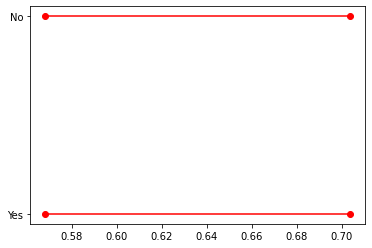

In [130]:
for lb,ub,y in zip(df_ci['lb'],df_ci['ub'],range(len(df_ci))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_ci)),list(df_ci['home']))

#### In Greece

In [131]:
df_noneutralgreece['home']=(df_noneutralgreece['home_team']=='Greece')

/var/folders/3m/bxpcj6d907q836kvw4zwr1340000gn/T/ipykernel_4752/1409324880.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_noneutralgreece['home']=(df_noneutralgreece['home_team']=='Greece')


In [132]:
df_noneutralgreece['home'].value_counts()

True     267
False      3
Name: home, dtype: int64

In [133]:
x=pd.crosstab(df_noneutralgreece['home'],df_noneutralgreece['result'],margins=True)

In [134]:
x

result,draw,lose,win,All
home,,,,
False,0,1,2,3
True,61,80,126,267
All,61,81,128,270


In [135]:
df_noneutralgreece.head(4)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,result,home
1268,1/26/1930,Greece,Yugoslavia,2,1,Balkan Cup,Athens,Greece,False,win,True
1364,12/7/1930,Greece,Bulgaria,6,1,Balkan Cup,Athens,Greece,False,win,True
1455,11/29/1931,Greece,Romania,2,4,Balkan Cup,Athens,Greece,False,lose,True
1472,3/27/1932,Greece,Bulgaria,1,2,Friendly,Athens,Greece,False,lose,True


In [136]:
x=np.array(x)

In [137]:
x

array([[  0,   1,   2,   3],
       [ 61,  80, 126, 267],
       [ 61,  81, 128, 270]])

In [138]:
CI_greecewin_home=proportion_confint(count=x[1,2],nobs=x[1,3],alpha=(1-.95))

In [139]:
CI_greecewin_home

(0.41203090706163165, 0.5317893176574695)

In [140]:
CI_greecewin_away=proportion_confint(count=x[0,2],nobs=x[0,3],alpha=(1-.95))

In [141]:
CI_greecewin_away

(0.13323203596052113, 1.0)

In [142]:
CI_greecewin = {}
CI_greecewin['home'] = ['Yes','No']
CI_greecewin['lb'] = [CI_greecewin_home[0],CI_greecewin_away[0]]
CI_greecewin['ub'] = [CI_greecewin_home[1],CI_greecewin_away[1]]
df_ci= pd.DataFrame(CI_greecewin)
df_ci

,home,lb,ub
0,Yes,0.412031,0.531789
1,No,0.133232,1.000000


([<matplotlib.axis.YTick at 0x7f82b1270f10>,
 [Text(0, 0, 'Yes'), Text(0, 1, 'No')])

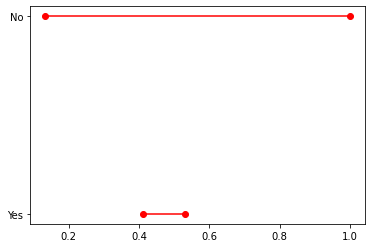

In [143]:
for lb,ub,y in zip(df_ci['lb'],df_ci['ub'],range(len(df_ci))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_ci)),list(df_ci['home']))

#### In Australia

In [144]:
df_noneutralaustralia['home']=(df_noneutralaustralia['home_team']=='Australia')

/var/folders/3m/bxpcj6d907q836kvw4zwr1340000gn/T/ipykernel_4752/943178846.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_noneutralaustralia['home']=(df_noneutralaustralia['home_team']=='Australia')


In [145]:
df_noneutralaustralia['home'].value_counts()

True    218
Name: home, dtype: int64

In [146]:
x=pd.crosstab(df_noneutralaustralia['home'],df_noneutralaustralia['result'],margins=True)

In [147]:
x

result,draw,lose,win,All
home,,,,
True,42,54,122,218
All,42,54,122,218


In [148]:
df_noneutralaustralia.head(4)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,result,home
726,6/9/1923,Australia,New Zealand,2,1,Friendly,Brisbane,Australia,False,win,True
729,6/16/1923,Australia,New Zealand,2,3,Friendly,Sydney,Australia,False,lose,True
737,6/30/1923,Australia,New Zealand,1,4,Friendly,Newcastle,Australia,False,lose,True
811,6/7/1924,Australia,Canada,3,2,Friendly,Brisbane,Australia,False,win,True


In [149]:
x=np.array(x)

In [150]:
x

array([[ 42,  54, 122, 218],
       [ 42,  54, 122, 218]])

In [151]:
CI_australiawin_home=proportion_confint(count=x[1,2],nobs=x[1,3],alpha=(1-.95))

In [152]:
CI_australiawin_home

(0.49373401870225625, 0.6255320363436153)

In [153]:
CI_australiawin_away=proportion_confint(count=x[0,2],nobs=x[0,3],alpha=(1-.95))

In [154]:
CI_australiawin_away

(0.49373401870225625, 0.6255320363436153)

In [155]:
CI_australiawin = {}
CI_australiawin['home'] = ['Yes','No']
CI_australiawin['lb'] = [CI_australiawin_home[0],CI_australiawin_away[0]]
CI_australiawin['ub'] = [CI_australiawin_home[1],CI_australiawin_away[1]]
df_ci= pd.DataFrame(CI_australiawin)
df_ci

,home,lb,ub
0,Yes,0.493734,0.625532
1,No,0.493734,0.625532


([<matplotlib.axis.YTick at 0x7f82a3c30f70>,
 [Text(0, 0, 'Yes'), Text(0, 1, 'No')])

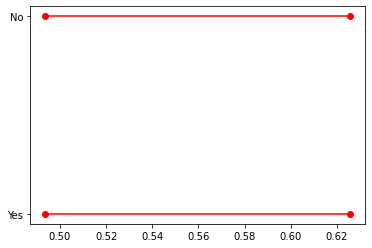

In [156]:
for lb,ub,y in zip(df_ci['lb'],df_ci['ub'],range(len(df_ci))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_ci)),list(df_ci['home']))

#### In Jamaica

In [157]:
df_noneutraljamaica['home']=(df_noneutraljamaica['home_team']=='Jamaica')

/var/folders/3m/bxpcj6d907q836kvw4zwr1340000gn/T/ipykernel_4752/3390571164.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_noneutraljamaica['home']=(df_noneutraljamaica['home_team']=='Jamaica')


In [158]:
df_noneutraljamaica['home'].value_counts()

True    221
Name: home, dtype: int64

In [159]:
x=pd.crosstab(df_noneutraljamaica['home'],df_noneutraljamaica['result'],margins=True)

In [160]:
x

result,draw,lose,win,All
home,,,,
True,55,49,117,221
All,55,49,117,221


In [161]:
df_noneutraljamaica.head(4)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,result,home
953,3/3/1926,Jamaica,Curaçao,2,0,Friendly,Kingston,Jamaica,False,win,True
1025,11/20/1926,Jamaica,Haiti,6,0,Friendly,Kingston,Jamaica,False,win,True
1855,12/28/1935,Jamaica,Trinidad and Tobago,2,3,Friendly,Kingston,Jamaica,False,lose,True
1857,1/4/1936,Jamaica,Trinidad and Tobago,0,1,Friendly,Kingston,Jamaica,False,lose,True


In [162]:
x=np.array(x)

In [163]:
x

array([[ 55,  49, 117, 221],
       [ 55,  49, 117, 221]])

In [164]:
CI_jamaicawin_home=proportion_confint(count=x[1,2],nobs=x[1,3],alpha=(1-.95))

In [165]:
CI_jamaicawin_home

(0.4636051907480843, 0.5952183386636805)

In [166]:
CI_jamaicawin_away=proportion_confint(count=x[0,2],nobs=x[0,3],alpha=(1-.95))

In [167]:
CI_jamaicawin_away

(0.4636051907480843, 0.5952183386636805)

In [168]:
CI_jamaicawin = {}
CI_jamaicawin['home'] = ['Yes','No']
CI_jamaicawin['lb'] = [CI_jamaicawin_home[0],CI_jamaicawin_away[0]]
CI_jamaicawin['ub'] = [CI_jamaicawin_home[1],CI_jamaicawin_away[1]]
df_ci= pd.DataFrame(CI_jamaicawin)
df_ci

,home,lb,ub
0,Yes,0.463605,0.595218
1,No,0.463605,0.595218


([<matplotlib.axis.YTick at 0x7f82a3c5e5b0>,
 [Text(0, 0, 'Yes'), Text(0, 1, 'No')])

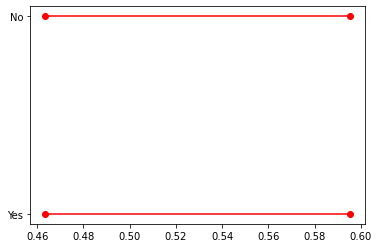

In [169]:
for lb,ub,y in zip(df_ci['lb'],df_ci['ub'],range(len(df_ci))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_ci)),list(df_ci['home']))

#### In Peru

In [170]:
df_noneutralperu['home']=(df_noneutralperu['home_team']=='Peru')

/var/folders/3m/bxpcj6d907q836kvw4zwr1340000gn/T/ipykernel_4752/4177427899.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_noneutralperu['home']=(df_noneutralperu['home_team']=='Peru')


In [171]:
df_noneutralperu['home'].value_counts()

True    243
Name: home, dtype: int64

In [172]:
x=pd.crosstab(df_noneutralperu['home'],df_noneutralperu['result'],margins=True)

In [173]:
x

result,draw,lose,win,All
home,,,,
True,53,82,108,243
All,53,82,108,243


In [174]:
df_noneutralperu.head(4)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,result,home
1096,11/1/1927,Peru,Uruguay,0,4,Copa América,Lima,Peru,False,lose,True
1103,11/13/1927,Peru,Bolivia,3,2,Copa América,Lima,Peru,False,win,True
1106,11/27/1927,Peru,Argentina,1,5,Copa América,Lima,Peru,False,lose,True
1757,1/13/1935,Peru,Uruguay,0,1,Copa América,Lima,Peru,False,lose,True


In [175]:
x=np.array(x)

In [176]:
x

array([[ 53,  82, 108, 243],
       [ 53,  82, 108, 243]])

In [177]:
CI_peruwin_home=proportion_confint(count=x[1,2],nobs=x[1,3],alpha=(1-.95))

In [178]:
CI_peruwin_home

(0.38196783645028837, 0.5069210524386005)

In [179]:
CI_peruwin_away=proportion_confint(count=x[0,2],nobs=x[0,3],alpha=(1-.95))

In [180]:
CI_peruwin_away

(0.38196783645028837, 0.5069210524386005)

In [181]:
CI_peruwin = {}
CI_peruwin['home'] = ['Yes','No']
CI_peruwin['lb'] = [CI_peruwin_home[0],CI_peruwin_away[0]]
CI_peruwin['ub'] = [CI_peruwin_home[1],CI_peruwin_away[1]]
df_ci= pd.DataFrame(CI_peruwin)
df_ci

,home,lb,ub
0,Yes,0.381968,0.506921
1,No,0.381968,0.506921


([<matplotlib.axis.YTick at 0x7f82b0cc8dc0>,
 [Text(0, 0, 'Yes'), Text(0, 1, 'No')])

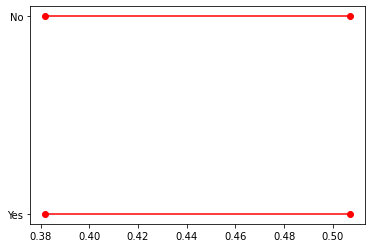

In [182]:
for lb,ub,y in zip(df_ci['lb'],df_ci['ub'],range(len(df_ci))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_ci)),list(df_ci['home']))

## Part 2: COVID-19 Cases 

### Abstract

### Discussion

### Conclusion

In the end, the bigger the interval, the greater the amount of daily cases varries.

#### Import the CSV file 

In [183]:
df=pd.read_csv('covid_data.csv',encoding='latin-1')

#### Show the first 5 records in the dataset

In [184]:
df.head()

,date,iso3c,country,income,region,continent,dcases,ddeaths,population,weekdays,month
0,2020-02-24,AFG,Afghanistan,Low income,South Asia,Asia,5,0,38041754,Mon,Feb
1,2020-02-25,AFG,Afghanistan,Low income,South Asia,Asia,0,0,38041754,Tue,Feb
2,2020-02-26,AFG,Afghanistan,Low income,South Asia,Asia,0,0,38041754,Wed,Feb
3,2020-02-27,AFG,Afghanistan,Low income,South Asia,Asia,0,0,38041754,Thu,Feb
4,2020-02-28,AFG,Afghanistan,Low income,South Asia,Asia,0,0,38041754,Fri,Feb


#### Show a description of the data

In [185]:
df.shape

(122843, 11)

In [186]:
df.describe()

,dcases,ddeaths,population
count,122843.000000,122843.000000,1.228430e+05
mean,2353.722996,44.293024,4.258179e+07
std,12256.414469,197.945108,1.521859e+08
min,0.000000,0.000000,1.800800e+04
25%,3.000000,0.000000,2.347706e+06
50%,98.000000,1.000000,9.746117e+06
75%,860.000000,13.000000,3.041786e+07
max,823225.000000,8786.000000,1.397715e+09


#### Categorize dataset according to weekdays

In [187]:
from pandas.api.types import CategoricalDtype
cats=['Fri', 'Sat', 'Sun','Mon','Tue','Wed','Thu']
cat_type = CategoricalDtype(categories=cats, ordered=True)
df['weekdays'] = df['weekdays'].astype(cat_type)

#### Get a list of all countries in the dataset 

In [188]:
df['country'].unique()

array(['Afghanistan', 'Angola', 'Albania', 'Andorra',
       'United Arab Emirates', 'Argentina', 'Armenia',
       'Antigua & Barbuda', 'Australia', 'Austria', 'Azerbaijan',
       'Burundi', 'Belgium', 'Benin', 'Burkina Faso', 'Bangladesh',
       'Bulgaria', 'Bahrain', 'Bahamas', 'Bosnia & Herzegovina',
       'Belarus', 'Belize', 'Bolivia', 'Brazil', 'Barbados', 'Brunei',
       'Bhutan', 'Botswana', 'Central African Republic', 'Canada',
       'Switzerland', 'Chile', 'China', 'Côte d\x92Ivoire', 'Cameroon',
       'Congo - Kinshasa', 'Congo - Brazzaville', 'Colombia', 'Comoros',
       'Cape Verde', 'Costa Rica', 'Cuba', 'Cyprus', 'Czechia', 'Germany',
       'Djibouti', 'Dominica', 'Denmark', 'Dominican Republic', 'Algeria',
       'Ecuador', 'Egypt', 'Spain', 'Estonia', 'Ethiopia', 'Finland',
       'Fiji', 'France', 'Gabon', 'United Kingdom', 'Georgia', 'Ghana',
       'Guinea', 'Gambia', 'Guinea-Bissau', 'Equatorial Guinea', 'Greece',
       'Grenada', 'Guatemala', 'Guyana', '

#### Check how many times each country is repeated in the dataset

In [189]:
df['country'].value_counts()

South Korea         710
Thailand            710
United States       710
Japan               710
China               710
                   ... 
Marshall Islands    430
Vanuatu             417
Samoa               409
Kiribati            228
Palau               132
Name: country, Length: 187, dtype: int64

In [190]:
df['country'].value_counts()[100:105]

Burkina Faso    662
Cyprus          662
Panama          662
Honduras        661
Bolivia         661
Name: country, dtype: int64

### Region #1 "South Asia"

In [191]:
dfsouthasia=df[df['region']=='South Asia']

#### According to weekdays

In [192]:
stats=dfsouthasia.groupby("weekdays").agg({"dcases": [np.mean, np.std, np.size]})

In [193]:
stats

dcases                   
                 mean           std size
weekdays                                
Fri       7431.310345  32802.999657  783
Sat       7376.027062  32737.918692  776
Sun       7111.449871  31193.018186  778
Mon       6398.382051  28586.412014  780
Tue       7092.568502  31118.422659  781
Wed       7614.115237  32990.647842  781
Thu       7497.819693  32780.954393  782

In [194]:
stats.index

CategoricalIndex(['Fri', 'Sat', 'Sun', 'Mon', 'Tue', 'Wed', 'Thu'], categories=['Fri', 'Sat', 'Sun', 'Mon', 'Tue', 'Wed', 'Thu'], ordered=True, dtype='category', name='weekdays')

In [195]:
ci95_hi = []
ci95_lo = []

In [196]:
for i in stats.index:
    m, s, n = stats.loc[i]
    x=scipy.stats.t.interval(.95, n-1, m,s/np.sqrt(n-1))
    ci95_hi.append(x[1])
    ci95_lo.append(x[0])

In [197]:
ci95_hi

[9733.976455327273,
 9684.512192026303,
 9308.156231736792,
 8408.92937096585,
 9279.790103371652,
 9932.929991578425,
 9800.415582421896]

In [198]:
ci95_lo

[5128.6442343279,
 5067.541931685037,
 4914.743511193799,
 4387.834731598252,
 4905.346900469578,
 5295.300482173176,
 5195.2238037673615]

In [199]:
stats['ci95_hi'] = ci95_hi
stats['ci95_lo'] = ci95_lo
print(stats)

               dcases                         ci95_hi      ci95_lo
                 mean           std size                          
weekdays                                                          
Fri       7431.310345  32802.999657  783  9733.976455  5128.644234
Sat       7376.027062  32737.918692  776  9684.512192  5067.541932
Sun       7111.449871  31193.018186  778  9308.156232  4914.743511
Mon       6398.382051  28586.412014  780  8408.929371  4387.834732
Tue       7092.568502  31118.422659  781  9279.790103  4905.346900
Wed       7614.115237  32990.647842  781  9932.929992  5295.300482
Thu       7497.819693  32780.954393  782  9800.415582  5195.223804


In [200]:
df_ci= pd.DataFrame(stats)

In [201]:
df_ci

dcases                         ci95_hi      ci95_lo
                 mean           std size                          
weekdays                                                          
Fri       7431.310345  32802.999657  783  9733.976455  5128.644234
Sat       7376.027062  32737.918692  776  9684.512192  5067.541932
Sun       7111.449871  31193.018186  778  9308.156232  4914.743511
Mon       6398.382051  28586.412014  780  8408.929371  4387.834732
Tue       7092.568502  31118.422659  781  9279.790103  4905.346900
Wed       7614.115237  32990.647842  781  9932.929992  5295.300482
Thu       7497.819693  32780.954393  782  9800.415582  5195.223804

In [202]:
df_ci.index

CategoricalIndex(['Fri', 'Sat', 'Sun', 'Mon', 'Tue', 'Wed', 'Thu'], categories=['Fri', 'Sat', 'Sun', 'Mon', 'Tue', 'Wed', 'Thu'], ordered=True, dtype='category', name='weekdays')

In [203]:
df_ci['weekdays']=df_ci.index

In [204]:
df_ci

dcases                         ci95_hi      ci95_lo weekdays
                 mean           std size                                   
weekdays                                                                   
Fri       7431.310345  32802.999657  783  9733.976455  5128.644234      Fri
Sat       7376.027062  32737.918692  776  9684.512192  5067.541932      Sat
Sun       7111.449871  31193.018186  778  9308.156232  4914.743511      Sun
Mon       6398.382051  28586.412014  780  8408.929371  4387.834732      Mon
Tue       7092.568502  31118.422659  781  9279.790103  4905.346900      Tue
Wed       7614.115237  32990.647842  781  9932.929992  5295.300482      Wed
Thu       7497.819693  32780.954393  782  9800.415582  5195.223804      Thu

In [205]:
df_ci.columns

MultiIndex([(  'dcases', 'mean'),
            (  'dcases',  'std'),
            (  'dcases', 'size'),
            ( 'ci95_hi',     ''),
            ( 'ci95_lo',     ''),
            ('weekdays',     '')],
           )

(4000.0, 11000.0)

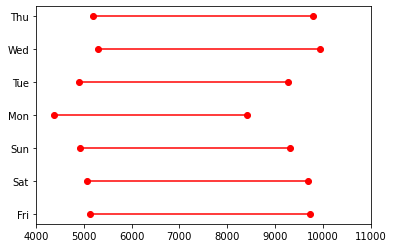

In [206]:
for lb,ub,y in zip(df_ci['ci95_lo'],df_ci['ci95_hi'],range(len(df_ci))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_ci)),list(df_ci['weekdays']))
plt.xlim([4000, 11000])

#### According to months

In [207]:
df['month'].value_counts()

Dec    11532
Oct    11432
Aug    11387
Jul    11377
May    11348
Nov    11134
Sep    11040
Jun    11010
Apr    10872
Mar     9785
Feb     6058
Jan     5868
Name: month, dtype: int64

In [208]:
cats=['Jan', 'Feb', 'Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
cat_type = CategoricalDtype(categories=cats, ordered=True)
dfsouthasia['month'] = df['month'].astype(cat_type)

/var/folders/3m/bxpcj6d907q836kvw4zwr1340000gn/T/ipykernel_4752/1718128285.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfsouthasia['month'] = df['month'].astype(cat_type)


In [209]:
stats=dfsouthasia.groupby("month").agg({"dcases": [np.mean, np.std, np.size]})

In [210]:
stats

dcases                   
               mean           std size
month                                 
Jan     2263.255725   5139.924497  262
Feb     1327.416149   3589.565517  322
Mar     2699.725367   9899.947404  477
Apr    15362.622917  61619.024194  480
May    19715.885081  73202.517513  496
Jun     6781.933333  19241.220814  480
Jul     6203.286290  12720.776592  496
Aug     7776.846774  17346.630743  496
Sep     8209.054167  21962.010226  480
Oct     5333.423387  15094.195852  496
Nov     3856.243750  10413.867170  480
Dec     2676.756048   6761.366075  496

In [211]:
stats.index

CategoricalIndex(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug',
                  'Sep', 'Oct', 'Nov', 'Dec'],
                 categories=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', ...], ordered=True, dtype='category', name='month')

In [212]:
ci95_hi = []
ci95_lo = []

In [213]:
for i in stats.index:
    m, s, n = stats.loc[i]
    x=scipy.stats.t.interval(.95, n-1, m,s/np.sqrt(n-1))
    ci95_hi.append(x[1])
    ci95_lo.append(x[0])

In [214]:
ci95_hi

[2889.729786938922,
 1721.581093590636,
 3591.35229359394,
 20894.772201182306,
 26180.38139424838,
 8509.408043478885,
 7326.654941825395,
 9308.72346783126,
 10180.801054001307,
 6666.388109579617,
 4791.199610916265,
 3273.850623129819]

In [215]:
ci95_lo

[1636.781663442757,
 933.2512045460098,
 1808.0984401586804,
 9830.47363215103,
 13251.388767041946,
 5054.458623187783,
 5079.917638819766,
 6244.970080555836,
 6237.307279332027,
 4000.4586646139323,
 2921.287889083735,
 2079.6614736443744]

In [216]:
stats['ci95_hi'] = ci95_hi
stats['ci95_lo'] = ci95_lo
print(stats)

             dcases                          ci95_hi       ci95_lo
               mean           std size                            
month                                                             
Jan     2263.255725   5139.924497  262   2889.729787   1636.781663
Feb     1327.416149   3589.565517  322   1721.581094    933.251205
Mar     2699.725367   9899.947404  477   3591.352294   1808.098440
Apr    15362.622917  61619.024194  480  20894.772201   9830.473632
May    19715.885081  73202.517513  496  26180.381394  13251.388767
Jun     6781.933333  19241.220814  480   8509.408043   5054.458623
Jul     6203.286290  12720.776592  496   7326.654942   5079.917639
Aug     7776.846774  17346.630743  496   9308.723468   6244.970081
Sep     8209.054167  21962.010226  480  10180.801054   6237.307279
Oct     5333.423387  15094.195852  496   6666.388110   4000.458665
Nov     3856.243750  10413.867170  480   4791.199611   2921.287889
Dec     2676.756048   6761.366075  496   3273.850623   2079.66

In [217]:
df_ci= pd.DataFrame(stats)

In [218]:
df_ci

dcases                          ci95_hi       ci95_lo
               mean           std size                            
month                                                             
Jan     2263.255725   5139.924497  262   2889.729787   1636.781663
Feb     1327.416149   3589.565517  322   1721.581094    933.251205
Mar     2699.725367   9899.947404  477   3591.352294   1808.098440
Apr    15362.622917  61619.024194  480  20894.772201   9830.473632
May    19715.885081  73202.517513  496  26180.381394  13251.388767
Jun     6781.933333  19241.220814  480   8509.408043   5054.458623
Jul     6203.286290  12720.776592  496   7326.654942   5079.917639
Aug     7776.846774  17346.630743  496   9308.723468   6244.970081
Sep     8209.054167  21962.010226  480  10180.801054   6237.307279
Oct     5333.423387  15094.195852  496   6666.388110   4000.458665
Nov     3856.243750  10413.867170  480   4791.199611   2921.287889
Dec     2676.756048   6761.366075  496   3273.850623   2079.661474

In [219]:
df_ci.index

CategoricalIndex(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug',
                  'Sep', 'Oct', 'Nov', 'Dec'],
                 categories=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', ...], ordered=True, dtype='category', name='month')

In [220]:
df_ci['month']=df_ci.index

In [221]:
df_ci

dcases                          ci95_hi       ci95_lo month
               mean           std size                                  
month                                                                   
Jan     2263.255725   5139.924497  262   2889.729787   1636.781663   Jan
Feb     1327.416149   3589.565517  322   1721.581094    933.251205   Feb
Mar     2699.725367   9899.947404  477   3591.352294   1808.098440   Mar
Apr    15362.622917  61619.024194  480  20894.772201   9830.473632   Apr
May    19715.885081  73202.517513  496  26180.381394  13251.388767   May
Jun     6781.933333  19241.220814  480   8509.408043   5054.458623   Jun
Jul     6203.286290  12720.776592  496   7326.654942   5079.917639   Jul
Aug     7776.846774  17346.630743  496   9308.723468   6244.970081   Aug
Sep     8209.054167  21962.010226  480  10180.801054   6237.307279   Sep
Oct     5333.423387  15094.195852  496   6666.388110   4000.458665   Oct
Nov     3856.243750  10413.867170  480   4791.199611   2921.287889   Nov
Dec     2676.756048   6761.366075  496   3273.850623   2079.661474   Dec

In [222]:
df_ci.columns

MultiIndex([( 'dcases', 'mean'),
            ( 'dcases',  'std'),
            ( 'dcases', 'size'),
            ('ci95_hi',     ''),
            ('ci95_lo',     ''),
            (  'month',     '')],
           )

(400.0, 30000.0)

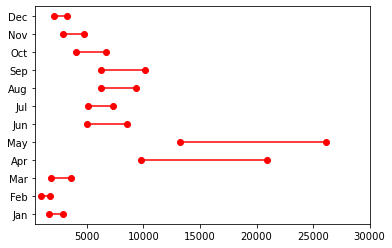

In [223]:
for lb,ub,y in zip(df_ci['ci95_lo'],df_ci['ci95_hi'],range(len(df_ci))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_ci)),list(df_ci['month']))
plt.xlim([400, 30000])